In [15]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pylab import bone, pcolor, colorbar, plot, show
import pylab as pl

In [2]:
data = pd.read_csv('Credit_Card_Applications.csv')
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
data.shape

(690, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [16]:
X = data.drop('Class', axis=1)
y = data['Class']

# X = dataset.iloc[:, :-1].values 
# y = dataset.iloc[:, -1].values

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [30]:
map_size = 5 * math.sqrt(len(X))
map_height = map_width = math.ceil(math.sqrt(map_size))

In [31]:
print(f'(map_height, map_width) = ({map_height}, {map_width})')
print(f'Number of features: {X.shape[1]}')

(map_height, map_width) = (12, 12)
Number of features: 15


In [32]:
# from minisom import MiniSom

# som = MiniSom(x=map_height, y=map_width, input_len=X.shape[1], sigma=1.0, learning_rate=0.5,
#                topology='hexagonal', random_seed=123)


In [33]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

In [47]:
# define SOM:

som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=15, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights

som.random_weights_init(X)

# Training

som.train_random(X, iterations)

In [48]:
import minisom
# Weights are:
wts = som.get_weights

# Returns the distance map from the weights:
som.distance_map()

array([[0.14763724, 0.38148829, 0.392561  , 0.32245742, 0.29892445,
        0.46728545, 0.39559674, 0.48849159, 0.36964485, 0.17520913],
       [0.42324335, 0.67059061, 0.62427358, 0.55580737, 0.53973292,
        0.46335374, 0.5457965 , 0.54356547, 0.63330499, 0.31457028],
       [0.41054269, 0.69776632, 0.64016483, 0.66197096, 0.45212025,
        0.57708558, 0.45067532, 0.6467332 , 0.61871909, 0.49229849],
       [0.30335172, 0.4871146 , 0.5204668 , 0.6074539 , 0.6743375 ,
        0.47692616, 0.5863324 , 0.68062007, 0.81075011, 0.43401014],
       [0.27880719, 0.49160292, 0.66956141, 0.75602173, 0.702193  ,
        0.54638135, 0.57755315, 0.52599486, 0.54289774, 0.57253346],
       [0.30866034, 0.6074839 , 0.66478797, 0.75028951, 0.70069113,
        0.62314427, 0.53643866, 0.499558  , 0.54798678, 0.44588684],
       [0.36008798, 0.57562747, 0.74284152, 0.81017544, 0.73870708,
        0.61893861, 0.61472892, 0.60657259, 0.60861491, 0.30732284],
       [0.46233332, 0.68599406, 0.7542528

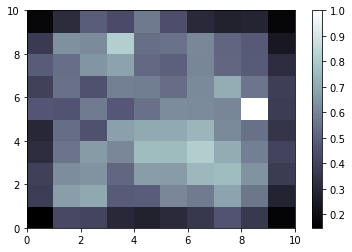

In [49]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()

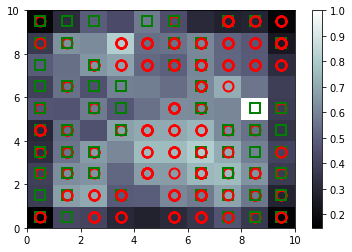

In [50]:
bone()

pcolor(som.distance_map().T)

colorbar() #gives legend

markers = ['o', 's']                     # if the observation is fraud then red circular color or else green square

colors = ['r', 'g']

for i, x in enumerate(X):

    w = som.winner(x)

    plot(w[0] + 0.5,

         w[1] + 0.5,

         markers[y[i]],

         markeredgecolor = colors[y[i]],

         markerfacecolor = 'None',

         markersize = 10,

         markeredgewidth = 2)

show()